In [15]:
import pandas as pd

df = pd.read_csv('/Users/FrancesY/Documents/Columbia/fall2022/5055practicum/DATA/csv/shoe_type_franyang_oct1.csv')

In [16]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,type
0,1493612427304488965,1KHABYS,125,2127,Be ¥a $elf or Bring ¥a $hooters! 👀🎮 BYS LLC™️ ...,Around da corner⭐️,Privileged never paid over box price for sneakers,2022-09-30 23:28:41+00:00,0,0,0,0,Sneakers
1,29560488,CarrieMae_,344,12283,"the devil works hard, kris jenner works harder","Brooklyn, NY",Trying to have a peaceful evening and at the r...,2022-09-30 23:21:03+00:00,0,0,0,0,Sneakers
2,22680919,MattHalfhill,13057,524,Founder + CEO of @nicekicks. DMs are open. sz 11,"Austin, TX",Drop sneakers at a job fair if you don’t want ...,2022-09-30 23:13:22+00:00,94,40,961,27,Sneakers
3,997270922976481282,JEFF_SON_334,605,3780,"Husband, Father to a son ,COOL MF in General U...","Montgomery, AL",I hate the fact that Puma ain’t got no sneaker...,2022-09-30 22:36:38+00:00,0,0,0,0,Sneakers
4,101915799,kwamemorgan,847,25434,Follow my IG : @Kwamemorgan,"ÜT: 38.899236,-76.797741",@1_Bundles You know my lil buddies gone geek t...,2022-09-30 22:33:35+00:00,0,1,0,0,Sneakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11846,304179492,blewis823,8126,119218,"No DMs, Still play Sims, 4ever Love Prince. St...",United States,Gave me something to think about. For real.\n\...,2022-08-01 03:50:54+00:00,1,3,6,0,Sandals
11847,1001178515256107009,ashtagnofilter,344,16220,just an irish girl from jersey city ⭐️ profess...,Thunder Road,Minus the sandals this is a classic Papa outfi...,2022-08-01 02:43:27+00:00,0,0,0,0,Sandals
11848,1539087986461114368,MouldofSteel,14,429,eBay Reseller,Wisconsin,Check out Nike Youth Boy's Kawa Slip On Slide ...,2022-08-01 02:39:01+00:00,0,0,2,0,Sandals
11849,1352673810,Kirbadactal23,129,42471,NaN,NaN,2 and a half hours until adidas sandals August,2022-08-01 01:34:39+00:00,0,0,0,0,Sandals


In [3]:
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt
from unicodedata import normalize

In [7]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [162]:
n_of_tweets = df.groupby("type").nunique()
n_of_tweets = n_of_tweets.reset_index()
n_of_tweets = n_of_tweets.rename(columns={'Unnamed: 0': 'tweet_count'})
n_of_tweets[['type','tweet_count']]

,type,tweet_count
0,Boots,7052
1,Business shoes,76
2,Loafers,239
3,Sandals,1043
4,Slippers,655
5,Sneakers,2786


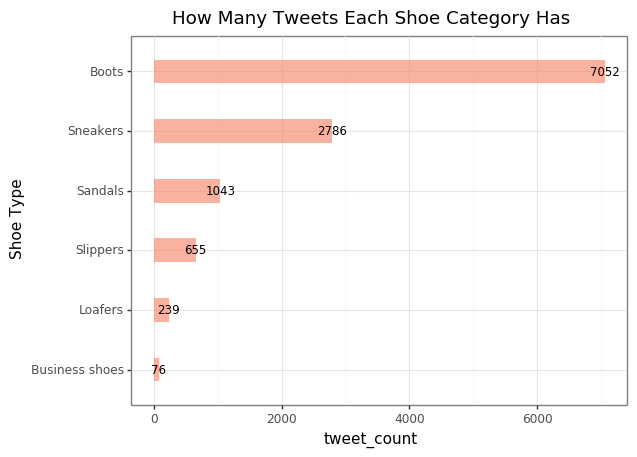

<ggplot: (8794859163093)>

In [163]:
(ggplot(n_of_tweets,
      aes(x = "reorder(type, tweet_count)", y = "tweet_count")) + 
 geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) + 
 geom_text(aes(label="tweet_count"), color="black", size=8.5)+
 labs(x = "Shoe Type", title = "How Many Tweets Each Shoe Category Has") + 
 coord_flip() + theme_bw())

In [184]:
df['text'] = df['text'].astype(str).str.lower()

# Tokenization
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)

,Unnamed: 0,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,type,text_token
0,0,1493612427304488965,1KHABYS,125,2127,Be ¥a $elf or Bring ¥a $hooters! 👀🎮 BYS LLC™️ ...,Around da corner⭐️,privileged never paid over box price for sneakers,2022-09-30 23:28:41+00:00,0,0,0,0,Sneakers,"[privileged, never, paid, over, box, price, fo..."
1,1,29560488,CarrieMae_,344,12283,"the devil works hard, kris jenner works harder","Brooklyn, NY",trying to have a peaceful evening and at the r...,2022-09-30 23:21:03+00:00,0,0,0,0,Sneakers,"[trying, to, have, a, peaceful, evening, and, ..."
2,2,22680919,MattHalfhill,13057,524,Founder + CEO of @nicekicks. DMs are open. sz 11,"Austin, TX",drop sneakers at a job fair if you don’t want ...,2022-09-30 23:13:22+00:00,94,40,961,27,Sneakers,"[drop, sneakers, at, a, job, fair, if, you, do..."


In [185]:
# Remove stopwords
from nltk.corpus import stopwords


stopwords = nltk.corpus.stopwords.words("english")

my_stopwords = ['https']
stopwords.extend(my_stopwords)


df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,Unnamed: 0,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,type,text_token
0,0,1493612427304488965,1KHABYS,125,2127,Be ¥a $elf or Bring ¥a $hooters! 👀🎮 BYS LLC™️ ...,Around da corner⭐️,privileged never paid over box price for sneakers,2022-09-30 23:28:41+00:00,0,0,0,0,Sneakers,"[privileged, never, paid, box, price, sneakers]"
1,1,29560488,CarrieMae_,344,12283,"the devil works hard, kris jenner works harder","Brooklyn, NY",trying to have a peaceful evening and at the r...,2022-09-30 23:21:03+00:00,0,0,0,0,Sneakers,"[trying, peaceful, evening, receiving, end, me..."
2,2,22680919,MattHalfhill,13057,524,Founder + CEO of @nicekicks. DMs are open. sz 11,"Austin, TX",drop sneakers at a job fair if you don’t want ...,2022-09-30 23:13:22+00:00,94,40,961,27,Sneakers,"[drop, sneakers, job, fair, want, snatched, re..."


In [186]:
# Remove infrequent words
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df[['text', 'text_token', 'text_string']].head()

,text,text_token,text_string
0,privileged never paid over box price for sneakers,"[privileged, never, paid, box, price, sneakers]",privileged never paid box price sneakers
1,trying to have a peaceful evening and at the r...,"[trying, peaceful, evening, receiving, end, me...",trying peaceful evening receiving end meltdown...
2,drop sneakers at a job fair if you don’t want ...,"[drop, sneakers, job, fair, want, snatched, re...",drop sneakers job fair want snatched resellers...
3,i hate the fact that puma ain’t got no sneaker...,"[hate, fact, puma, got, sneakers, like, go, th...",hate fact puma got sneakers like themarathoncl...
4,@1_bundles you know my lil buddies gone geek t...,"[1_bundles, know, lil, buddies, gone, geek, ol...",1_bundles know lil buddies gone geek old sneakers


In [187]:
# Create a list of all words
all_words = ' '.join([word for word in df['text_string']])

# Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

#Create a frequency distribution which records the number of times each word has occurred:

from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'boots': 7347, 'sneakers': 2894, 'sandals': 1104, 'like': 1013, 'amp': 975, 'get': 927, 'wear': 746, 'new': 721, 'got': 672, 'slippers': 667, ...})

In [188]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

df[['text', 'text_token', 'text_string', 'text_string_fdist']].head()

,text,text_token,text_string,text_string_fdist
0,privileged never paid over box price for sneakers,"[privileged, never, paid, box, price, sneakers]",privileged never paid box price sneakers,privileged never paid box price sneakers
1,trying to have a peaceful evening and at the r...,"[trying, peaceful, evening, receiving, end, me...",trying peaceful evening receiving end meltdown...,trying peaceful evening receiving end meltdown...
2,drop sneakers at a job fair if you don’t want ...,"[drop, sneakers, job, fair, want, snatched, re...",drop sneakers job fair want snatched resellers...,drop sneakers job fair want snatched resellers...
3,i hate the fact that puma ain’t got no sneaker...,"[hate, fact, puma, got, sneakers, like, go, th...",hate fact puma got sneakers like themarathoncl...,hate fact puma got sneakers like themarathoncl...
4,@1_bundles you know my lil buddies gone geek t...,"[1_bundles, know, lil, buddies, gone, geek, ol...",1_bundles know lil buddies gone geek old sneakers,1_bundles know lil buddies gone geek old sneakers


In [189]:
# Lemmatization

from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [190]:
df[['text', 'text_token', 'text_string', 'text_string_fdist', 'text_string_lem']].head()

,text,text_token,text_string,text_string_fdist,text_string_lem
0,privileged never paid over box price for sneakers,"[privileged, never, paid, box, price, sneakers]",privileged never paid box price sneakers,privileged never paid box price sneakers,privileged never paid box price sneakers
1,trying to have a peaceful evening and at the r...,"[trying, peaceful, evening, receiving, end, me...",trying peaceful evening receiving end meltdown...,trying peaceful evening receiving end meltdown...,trying peaceful evening receiving end meltdown...
2,drop sneakers at a job fair if you don’t want ...,"[drop, sneakers, job, fair, want, snatched, re...",drop sneakers job fair want snatched resellers...,drop sneakers job fair want snatched resellers...,drop sneakers job fair want snatched resellers...
3,i hate the fact that puma ain’t got no sneaker...,"[hate, fact, puma, got, sneakers, like, go, th...",hate fact puma got sneakers like themarathoncl...,hate fact puma got sneakers like themarathoncl...,hate fact puma got sneakers like themarathoncl...
4,@1_bundles you know my lil buddies gone geek t...,"[1_bundles, know, lil, buddies, gone, geek, ol...",1_bundles know lil buddies gone geek old sneakers,1_bundles know lil buddies gone geek old sneakers,1_bundles know lil buddies gone geek old sneakers


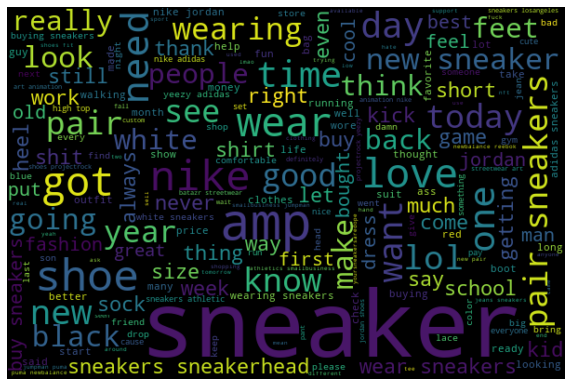

In [194]:
# Sneakers 
df_sneakers = df[df['type'] == 'Sneakers'] 
df_sneakers
# Word cloud
all_words_lem = ' '.join([word for word in df_sneakers['text_string_lem']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

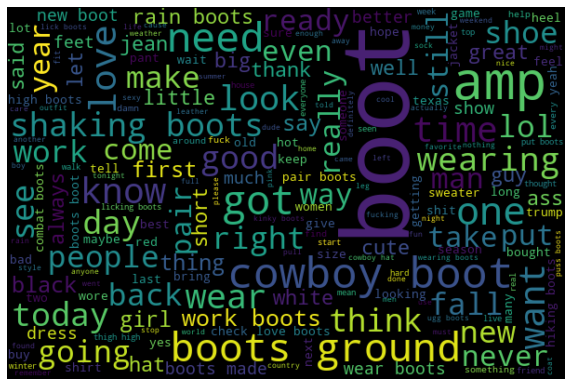

In [195]:
# Boots word cloud
df_boots = df[df['type'] == 'Boots'] 
df_boots

all_words_lem = ' '.join([word for word in df_boots['text_string_lem']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [2]:
df2 = pd.read_csv('/Users/FrancesY/Documents/Columbia/fall2022/5055practicum/DATA/csv/brands_franyang_oct1.csv')

In [9]:
df2.drop(['Unnamed: 0'], axis = 1, inplace = True)
df2

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,brand
0,1549441622231900164,SuchitaHedau,353,1465,NaN,NaN,@kuchbhishubhh Puma shoes 😮,2022-09-30 23:59:39+00:00,0,0,1,0,Puma
1,997270922976481282,JEFF_SON_334,606,3780,"Husband, Father to a son ,COOL MF in General U...","Montgomery, AL",I hate the fact that Puma ain’t got no sneaker...,2022-09-30 22:36:38+00:00,0,0,0,0,Puma
2,69133413,tarsismenezes,391,34992,BBBholic,"Los Angeles, CA",@slashviolence @PUMA @neymarjr @pumafootball Y...,2022-09-30 22:05:04+00:00,0,0,0,0,Puma
3,508551405,My_business_man,663,18657,"This life is 100% your responsibility, so know...",Free in the World,@i95Bully @ForeverKnicks_ Nah. Puma store on 4...,2022-09-30 17:33:24+00:00,0,1,1,0,Puma
4,66769124,THIAGAOAGUIAR,1530,49626,"Paulistano , Sobrevivente ! Enquanto meu coraç...","Weehawken, NJ",Extremely disappointed PUMA . The LGBTQA+ suff...,2022-09-30 16:08:20+00:00,0,0,3,0,Puma
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15270,40580353,JBlock49,4223,143775,total football surrogate // team site coverage...,"Portland, OR",i wonder how many sports bras chloe kelly sold...,2022-08-01 00:42:17+00:00,2,0,4,0,Nike
15271,1515614465097568258,babydevoh,15,206,the angry Aries ♈️,NaN,Hiked the nike hill today🏃‍♂️✅,2022-08-01 00:18:54+00:00,0,0,0,0,Nike
15272,1307302810019491841,ifquinnhadagram,400,16507,❤️ 👶🏼Quinn.Oregon’04 via LA.❤️=🔋&🔋is everythin...,"Los Angeles, CA",@WTDduckss @Nike Yes yes and yes,2022-08-01 00:05:11+00:00,0,0,0,0,Nike
15273,1692907934,imwawit,16,2986,It's not easy to be me. I wasn't a good boy at...,"NY, NY",@GracezyUchi @Nike Thanks Bunso ❤️,2022-08-01 00:03:14+00:00,0,0,0,0,Nike


In [9]:
n_of_tweets = df2.groupby("brand").nunique()
n_of_tweets = n_of_tweets.reset_index()
n_of_tweets = n_of_tweets.rename(columns={'Unnamed: 0': 'tweet_count'})
n_of_tweets

,brand,tweet_count,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count
0,Adidas,2350,1585,1585,1115,1535,1467,829,2348,2348,31,26,89,12
1,Allbirds,76,67,67,66,66,62,51,76,76,4,6,14,2
2,Converse,946,805,805,681,799,757,488,945,945,16,14,56,9
3,Keds,41,35,35,34,35,33,28,41,41,3,4,10,2
4,New Balance,666,594,594,522,587,561,394,666,666,17,17,48,8
5,Nike,7895,4732,4731,2297,4348,4387,2220,7888,7884,45,38,152,21
6,Puma,742,495,495,440,488,462,318,741,742,17,13,42,6
7,Reebok,246,200,200,188,199,186,143,246,246,7,8,24,2
8,Skechers,64,58,58,56,58,51,45,64,64,4,5,10,2
9,Toms,696,340,340,317,336,315,232,668,692,9,7,27,3


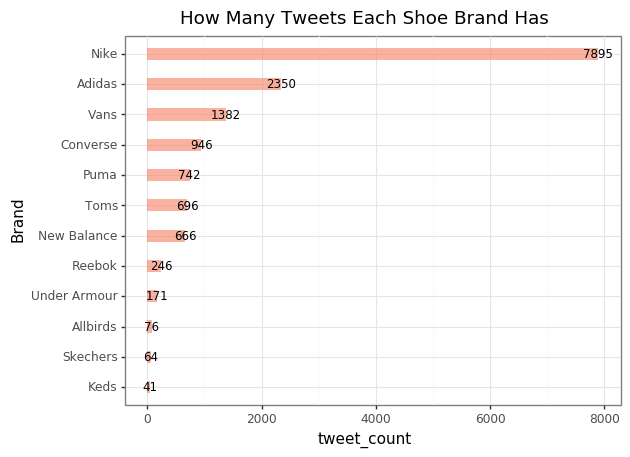

<ggplot: (8781509494493)>

In [10]:
(ggplot(n_of_tweets,
      aes(x = "reorder(brand, tweet_count)", y = "tweet_count")) + 
 geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) + 
 geom_text(aes(label="tweet_count"), color="black", size=8.5)+
 labs(x = "Brand", title = "How Many Tweets Each Shoe Brand Has") + 
 coord_flip() + theme_bw())

In [200]:
df2['text'] = df2['text'].astype(str).str.lower()

# Tokenization

regexp = RegexpTokenizer('\w+')

df2['text_token']=df2['text'].apply(regexp.tokenize)
df2.head(3)

,Unnamed: 0,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,brand,text_token
0,0,1549441622231900164,SuchitaHedau,353,1465,NaN,NaN,@kuchbhishubhh puma shoes 😮,2022-09-30 23:59:39+00:00,0,0,1,0,Puma,"[kuchbhishubhh, puma, shoes]"
1,1,997270922976481282,JEFF_SON_334,606,3780,"Husband, Father to a son ,COOL MF in General U...","Montgomery, AL",i hate the fact that puma ain’t got no sneaker...,2022-09-30 22:36:38+00:00,0,0,0,0,Puma,"[i, hate, the, fact, that, puma, ain, t, got, ..."
2,2,69133413,tarsismenezes,391,34992,BBBholic,"Los Angeles, CA",@slashviolence @puma @neymarjr @pumafootball y...,2022-09-30 22:05:04+00:00,0,0,0,0,Puma,"[slashviolence, puma, neymarjr, pumafootball, ..."


In [201]:
# Remove stopwords


stopwords = nltk.corpus.stopwords.words("english")

my_stopwords = ['https']
stopwords.extend(my_stopwords)


df2['text_token'] = df2['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df2.head(3)

,Unnamed: 0,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,brand,text_token
0,0,1549441622231900164,SuchitaHedau,353,1465,NaN,NaN,@kuchbhishubhh puma shoes 😮,2022-09-30 23:59:39+00:00,0,0,1,0,Puma,"[kuchbhishubhh, puma, shoes]"
1,1,997270922976481282,JEFF_SON_334,606,3780,"Husband, Father to a son ,COOL MF in General U...","Montgomery, AL",i hate the fact that puma ain’t got no sneaker...,2022-09-30 22:36:38+00:00,0,0,0,0,Puma,"[hate, fact, puma, got, sneakers, like, go, th..."
2,2,69133413,tarsismenezes,391,34992,BBBholic,"Los Angeles, CA",@slashviolence @puma @neymarjr @pumafootball y...,2022-09-30 22:05:04+00:00,0,0,0,0,Puma,"[slashviolence, puma, neymarjr, pumafootball, ..."


In [202]:
# Remove infrequent words
df2['text_string'] = df2['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df2[['text', 'text_token', 'text_string']].head()

,text,text_token,text_string
0,@kuchbhishubhh puma shoes 😮,"[kuchbhishubhh, puma, shoes]",kuchbhishubhh puma shoes
1,i hate the fact that puma ain’t got no sneaker...,"[hate, fact, puma, got, sneakers, like, go, th...",hate fact puma got sneakers like themarathoncl...
2,@slashviolence @puma @neymarjr @pumafootball y...,"[slashviolence, puma, neymarjr, pumafootball, ...",slashviolence puma neymarjr pumafootball yes next
3,@i95bully @foreverknicks_ nah. puma store on 4...,"[i95bully, foreverknicks_, nah, puma, store, 4...",i95bully foreverknicks_ nah puma store fifth a...
4,extremely disappointed puma . the lgbtqa+ suff...,"[extremely, disappointed, puma, lgbtqa, suffer...",extremely disappointed puma lgbtqa suffering d...


In [203]:
# Create a list of all words
all_words = ' '.join([word for word in df2['text_string']])

# Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

#Create a frequency distribution which records the number of times each word has occurred:


fdist = FreqDist(tokenized_words)
fdist

FreqDist({'nike': 8673, 'adidas': 2806, 'new': 1561, 'vans': 1477, 'like': 1224, 'amp': 1035, 'shoes': 1024, 'converse': 969, 'get': 867, 'puma': 813, ...})

In [205]:
df2['text_string_fdist'] = df2['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

df2[['text', 'text_token', 'text_string', 'text_string_fdist']].head()

,text,text_token,text_string,text_string_fdist
0,@kuchbhishubhh puma shoes 😮,"[kuchbhishubhh, puma, shoes]",kuchbhishubhh puma shoes,kuchbhishubhh puma shoes
1,i hate the fact that puma ain’t got no sneaker...,"[hate, fact, puma, got, sneakers, like, go, th...",hate fact puma got sneakers like themarathoncl...,hate fact puma got sneakers like themarathoncl...
2,@slashviolence @puma @neymarjr @pumafootball y...,"[slashviolence, puma, neymarjr, pumafootball, ...",slashviolence puma neymarjr pumafootball yes next,slashviolence puma neymarjr pumafootball yes next
3,@i95bully @foreverknicks_ nah. puma store on 4...,"[i95bully, foreverknicks_, nah, puma, store, 4...",i95bully foreverknicks_ nah puma store fifth a...,i95bully foreverknicks_ nah puma store fifth a...
4,extremely disappointed puma . the lgbtqa+ suff...,"[extremely, disappointed, puma, lgbtqa, suffer...",extremely disappointed puma lgbtqa suffering d...,extremely disappointed puma lgbtqa suffering d...


In [206]:
# Lemmatization



wordnet_lem = WordNetLemmatizer()

df2['text_string_lem'] = df2['text_string_fdist'].apply(wordnet_lem.lemmatize)

df2[['text', 'text_token', 'text_string', 'text_string_fdist', 'text_string_lem']].head()

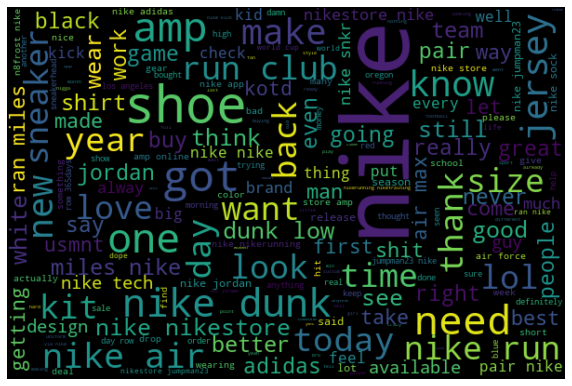

In [211]:
# Nike word cloud
df_nike = df2[df2['brand'] == 'Nike'] 
df_nike

all_words_lem = ' '.join([word for word in df_nike['text_string_lem']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

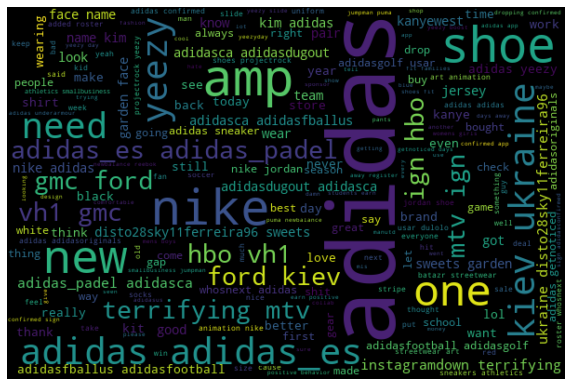

In [212]:
# Adidas word cloud
df_adidas = df2[df2['brand'] == 'Adidas'] 
df_adidas

all_words_lem = ' '.join([word for word in df_adidas['text_string_lem']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');